## Preparing data to be used in the web map

### 1. Downloading New Jersey boundary as GeoJSON

In [20]:
import cenpy as cen
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Get the NJ state boundary from the TIGER API to plot with the data (see Census
# Jupyter Notebook for more exploration of this process)
con = cen.base.Connection('ACSDT5Y2017')
con.set_mapservice('tigerWMS_ACS2017')

#Get state boundary data
NJ_boundary = con.mapservice.query(layer=82, where='STATE=34',pkg='geopandas')

In [4]:
# The current way the crs is stored is a dictionary using latestwkid, which causes errors during export. I converted the crs 
# dictionary into one readable by geopandas, but it is not transforming the data in any way. 
NJ_boundary.crs = {'init': 'epsg:3857'}

In [5]:
NJ_boundary = NJ_boundary.to_crs({'init': 'epsg:4326'})

In [6]:
# Save file as GeoJSON
NJ_boundary.to_file('NJ_boundary.geojson', driver='GeoJSON')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [7]:
NJ = gpd.read_file('NJ_boundary.geojson')

In [8]:
NJ.crs

{'init': 'epsg:4326'}

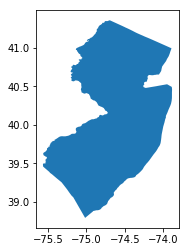

In [9]:
NJ.plot()

### 2. Convert PWS data (areal weighting) to right coordinate system

In [10]:
aw = gpd.read_file('../../data/Created/SpatialAnalysis/AW_vios.geojson')

In [11]:
aw.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 17 columns):
PWID                         456 non-null object
PWS_area                     456 non-null float64
PWS_total_                   456 non-null float64
PWS_pov_po                   456 non-null float64
PWS_POC_po                   456 non-null float64
perc_pov                     456 non-null float64
perc_POC                     456 non-null float64
urban_rural                  456 non-null object
PRIMARY_SOURCE_CODE          456 non-null object
OWNER_TYPE_CODE              456 non-null object
SERVICE_CONNECTIONS_COUNT    456 non-null int64
COUNTIES_SERVED              456 non-null object
all_violations               456 non-null int64
health_violations            456 non-null int64
primary_source               456 non-null object
owner_type                   456 non-null object
geometry                     456 non-null object
dtypes: float64(6), int64(3), object(8)
memory usag

In [12]:
aw.crs

{'init': 'epsg:3424'}

In [13]:
aw = aw.to_crs({'init': 'epsg:4326'})

In [14]:
aw.to_file('pws_aw.geojson', driver='GeoJSON')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


#### 2b. Determine Natural Jenks breaks

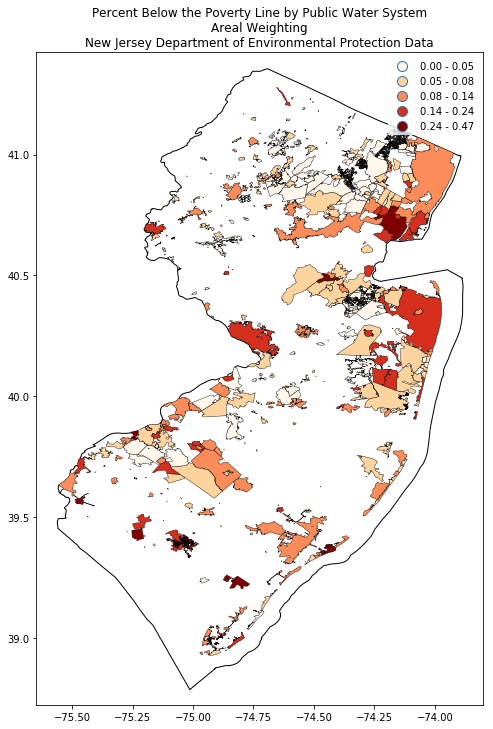

In [28]:
# Plotting percent below the poverty line by public water system
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
NJ.plot(ax=ax,
                edgecolor='black',
                facecolor='white')
aw.plot(ax = ax,
             column='perc_pov', 
             scheme='fisher_jenks',
             k=5,
             cmap='OrRd',
             edgecolor='black',
             linewidth=0.4, 
             legend=True)

# Geopandas source codes as the legend as a second axis
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)
#legend.set(title = 'Percentage Below the Poverty Line')

# Add title to map
ax.set(title = "Percent Below the Poverty Line by Public Water System\n" +
       "Areal Weighting\n"+
       "New Jersey Department of Environmental Protection Data")

# Turn off the axis
plt.axis('equal')
#ax.set_axis_off()
plt.show()

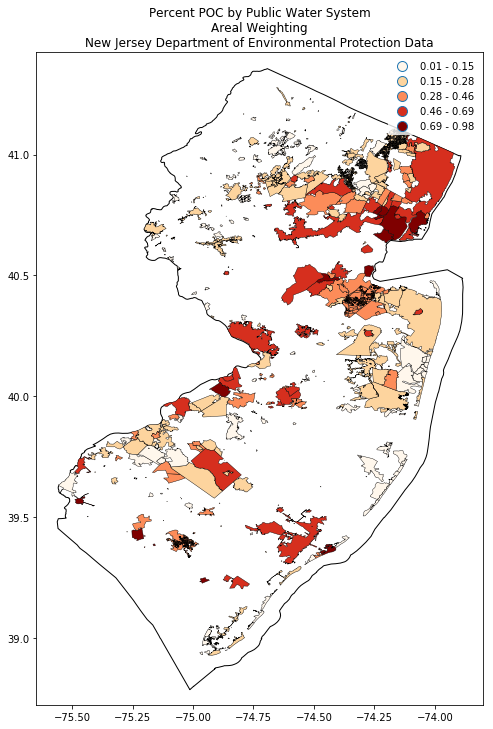

In [27]:
# Plotting percent people of color by public water system
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
NJ.plot(ax=ax,
                edgecolor='black',
                facecolor='white')
aw.plot(ax = ax,
             column='perc_POC', 
             scheme='fisher_jenks',
             k=5,
             cmap='OrRd',
             edgecolor='black',
             linewidth=0.4, 
             legend=True)

# Geopandas source codes as the legend as a second axis
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)
#legend.set(title = 'Percentage Below the Poverty Line')

# Add title to map
ax.set(title = "Percent POC by Public Water System\n" +
       "Areal Weighting\n"+
       "New Jersey Department of Environmental Protection Data")

# Turn off the axis
plt.axis('equal')
#ax.set_axis_off()
plt.show()

### 3. Convert PWS data (county-level analysis) to right coordinate system

In [29]:
county = gpd.read_file('../../data/Created/SpatialAnalysis/county_vios.geojson')

In [30]:
county.crs

{'init': 'epsg:3424'}

In [31]:
county = county.to_crs({'init': 'epsg:4326'})

In [32]:
county.to_file('pws_county.geojson', driver='GeoJSON')

C:\Users\zstat\Anaconda2\envs\py36\lib\site-packages\geopandas\io\file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


#### 3b. Determine Natural Jenks breaks

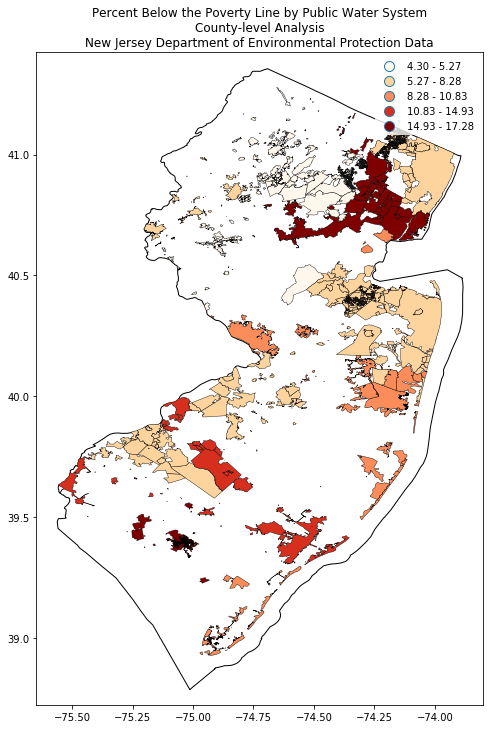

In [33]:
# Plotting percent below the poverty line by public water system
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
NJ.plot(ax=ax,
                edgecolor='black',
                facecolor='white')
county.plot(ax = ax,
             column='perc_pov', 
             scheme='fisher_jenks',
             k=5,
             cmap='OrRd',
             edgecolor='black',
             linewidth=0.4, 
             legend=True)

# Geopandas source codes as the legend as a second axis
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)
#legend.set(title = 'Percentage Below the Poverty Line')

# Add title to map
ax.set(title = "Percent Below the Poverty Line by Public Water System\n" +
       "County-level Analysis\n"+
       "New Jersey Department of Environmental Protection Data")

# Turn off the axis
plt.axis('equal')
#ax.set_axis_off()
plt.show()

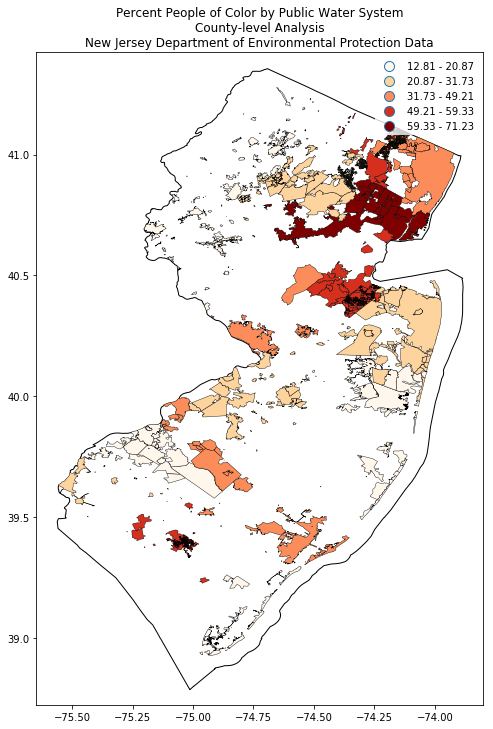

In [34]:
# Plotting percent people of color by public water system
# Plot the data
fig, ax = plt.subplots(figsize = (8,12))
NJ.plot(ax=ax,
                edgecolor='black',
                facecolor='white')
county.plot(ax = ax,
             column='perc_POC', 
             scheme='fisher_jenks',
             k=5,
             cmap='OrRd',
             edgecolor='black',
             linewidth=0.4, 
             legend=True)

# Geopandas source codes as the legend as a second axis
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)
#legend.set(title = 'Percentage Below the Poverty Line')

# Add title to map
ax.set(title = "Percent People of Color by Public Water System\n" +
       "County-level Analysis\n"+
       "New Jersey Department of Environmental Protection Data")

# Turn off the axis
plt.axis('equal')
#ax.set_axis_off()
plt.show()